### Izuogu Chibuzor Godson
Email: godsonizuogu@gmail.com

## Table of contents:

1. [Importing libraries](#Libraries)
2. [Loading dataset](#Data)
3. [Statistical summaries](#Statistics)
4. [Missing values and duplicates](#Missing)
5. [Outliers detection](#Outliers)
6. [Correlations - EDA](#Correlations)
7. [Feature engineering](#Engineering)
8. [Data Preprocessing](#Preprocess)
9. [Modelling / Model evaluation](#Modelling)
10. [Making predictions of the test set and saving the model](#Predictions)



In [26]:
# Importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

%matplotlib inline
plt.rcParams["figure.figsize"]=(20,7)
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading the Dataset
energy_data = pd.read_csv("energydata_complete.csv")#.set_index("date")
energy_data.head()#.reset_index()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [8]:
energy_data.shape

(19735, 29)

In [4]:
#rename columns
column_names = {'Appliances':'Appliances', 'lights':'lights', 'T1':'Temp_in_Kitchen_Area', 'RH_1':'Humidity_in_Kitchen_Area',
                'T2':'Temp_in_Living_Room_Area', 'RH_2':'Humidity_in_Living_Room_Area', 'T3':'Temp_in_Laundry_Room_Area',
                'RH_3':'Humidity_in_Living_Room_Area', 'T4':'Temp_in_office_Room','RH_4':'Humidity_in_Office_Room', 'T5':'Temp_in_Bathroom', 
                'RH_5':'Humidity_in_Bathroom', 'T6':'Temp_outside_the_Building', 'RH_6':'Humidity_outside_the_Building', 'T7':'Temp_in_Ironing_Room', 
                'RH_7':'Humidity_in_Ironing_Room', 'T8':'Temp_in_Teenager_Room_2', 'RH_8':'Humidity_in_Teenager_Room_2', 'T9':'Temp_in_Parents_Room',
                'RH_9':'Humidity_in_Parents_Room', 'T_out':'Temp_Outside', 'Press_mm_hg':'Press_mm_hg', 'RH_out':'Humidity_Outside', 'Windspeed':'Windspeed', 
                'Visibility':'Visibility', 'Tdewpoint':'Temp_Dew_Point', 'rv1':'Random_Variable_1', 'rv2':'Random_Variable_2'}

energy_data_1 = energy_data.rename(columns=column_names)
energy_data_1.head()

,date,Appliances,lights,Temp_in_Kitchen_Area,Humidity_in_Kitchen_Area,Temp_in_Living_Room_Area,Humidity_in_Living_Room_Area,Temp_in_Laundry_Room_Area,Humidity_in_Living_Room_Area,Temp_in_office_Room,...,Temp_in_Parents_Room,Humidity_in_Parents_Room,Temp_Outside,Press_mm_hg,Humidity_Outside,Windspeed,Visibility,Temp_Dew_Point,Random_Variable_1,Random_Variable_2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [5]:
# Prints out the names of the columns
energy_data_1.columns

Index(['date', 'Appliances', 'lights', 'Temp_in_Kitchen_Area',
       'Humidity_in_Kitchen_Area', 'Temp_in_Living_Room_Area',
       'Humidity_in_Living_Room_Area', 'Temp_in_Laundry_Room_Area',
       'Humidity_in_Living_Room_Area', 'Temp_in_office_Room',
       'Humidity_in_Office_Room', 'Temp_in_Bathroom', 'Humidity_in_Bathroom',
       'Temp_outside_the_Building', 'Humidity_outside_the_Building',
       'Temp_in_Ironing_Room', 'Humidity_in_Ironing_Room',
       'Temp_in_Teenager_Room_2', 'Humidity_in_Teenager_Room_2',
       'Temp_in_Parents_Room', 'Humidity_in_Parents_Room', 'Temp_Outside',
       'Press_mm_hg', 'Humidity_Outside', 'Windspeed', 'Visibility',
       'Temp_Dew_Point', 'Random_Variable_1', 'Random_Variable_2'],
      dtype='object')

In [6]:
len(energy_data_1.columns)

29

In [7]:
# Checking the values in the two columns
energy_data_1[["Random_Variable_1", "Random_Variable_2"]]

,Random_Variable_1,Random_Variable_2
0,13.275433,13.275433
1,18.606195,18.606195
2,28.642668,28.642668
3,45.410389,45.410389
4,10.084097,10.084097
...,...,...
19730,43.096812,43.096812
19731,49.282940,49.282940
19732,29.199117,29.199117
19733,6.322784,6.322784


## Summary Statistics

In [9]:
energy_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   date                             19735 non-null  object 
 1   Appliances                       19735 non-null  int64  
 2   lights                           19735 non-null  int64  
 3   Temp_in_Kitchen_Area             19735 non-null  float64
 4   Humidity_in_Kitchen_Area         19735 non-null  float64
 5   Temperature_in_Living_Room_Area  19735 non-null  float64
 6   Humidity_in_Living_Room_Area     19735 non-null  float64
 7   Temp_in_Laundry_Room_Area        19735 non-null  float64
 8   Humidity_in_Living_Room_Area     19735 non-null  float64
 9   Temp_in_office_Room              19735 non-null  float64
 10  Humidity_in_Office_Room          19735 non-null  float64
 11  Temp_in_Bathroom                 19735 non-null  float64
 12  Humidity_in_Bathro

In [18]:
energy_data_1.describe()

,Appliances,lights,Temp_in_Kitchen_Area,Humidity_in_Kitchen_Area,Temp_in_Living_Room_Area,Humidity_in_Living_Room_Area,Temp_in_Laundry_Room_Area,Humidity_in_Living_Room_Area,Temp_in_office_Room,Humidity_in_Office_Room,...,Temp_in_Parents_Room,Humidity_in_Parents_Room,Temp_Outside,Press_mm_hg,Humidity_Outside,Windspeed,Visibility,Temp_Dew_Point,Random_Variable_1,Random_Variable_2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


## Missing Values and Duplicates

In [35]:
# Check for missing values
energy_data_1.isnull().any().sum()

0

No missing value

In [34]:
# Check for duplicates
energy_data_1.duplicated().any()

False

No duplicate values

## Outlier Detection

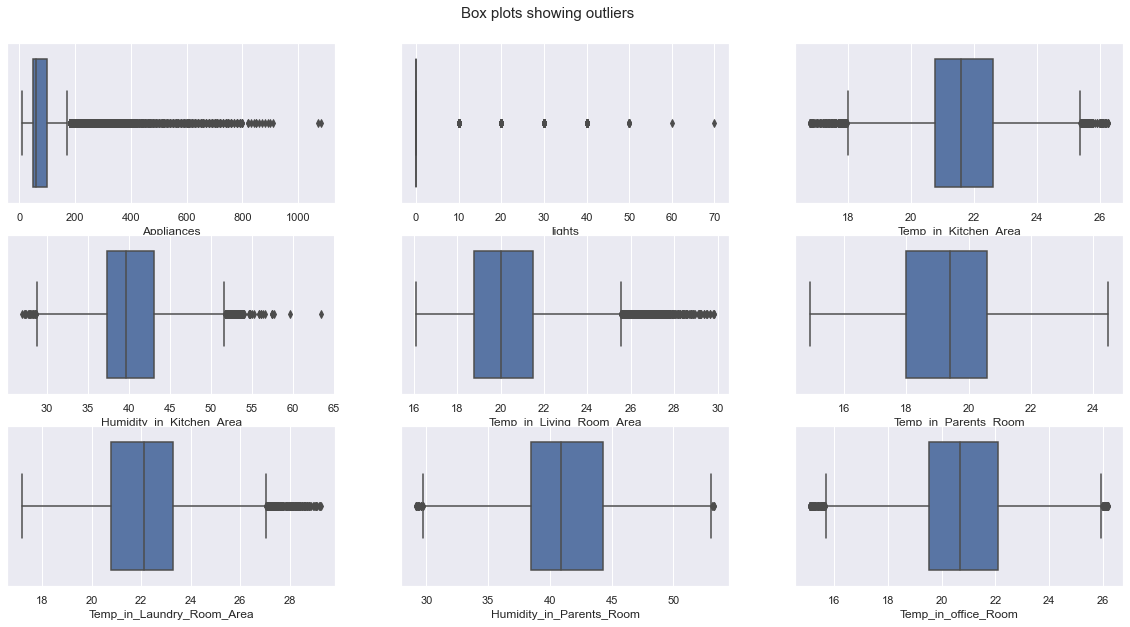

In [33]:
 #Plotting boxplots for each of the numerical columns
sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (20, 10))
fig.suptitle('Box plots showing outliers', y= 0.93, fontsize = 15)

for ax, data, name in zip(axes.flatten(), energy_data_1, ["Appliances",	"lights", "Temp_in_Kitchen_Area", "Humidity_in_Kitchen_Area", 
                                                          "Temp_in_Living_Room_Area", "Temp_in_Parents_Room", 
                                                          "Temp_in_Laundry_Room_Area", "Humidity_in_Parents_Room", 
                                                          "Temp_in_office_Room"]):
  sns.boxplot(energy_data_1[name], ax = ax)

## Correlation - EDA

In [11]:
energy_data_1.corr()

,Appliances,lights,Temp_in_Kitchen_Area,Humidity_in_Kitchen_Area,Temperature_in_Living_Room_Area,Humidity_in_Living_Room_Area,Temp_in_Laundry_Room_Area,Humidity_in_Living_Room_Area,Temp_in_office_Room,Humidity_in_Office_Room,...,Temp_in_Parents_Room,Humidity_in_Parents_Room,Temp_Outside,Press_mm_hg,Humidity_Outside,Windspeed,Visibility,Temp_Dew_Point,Random_Variable_1,Random_Variable_2
Appliances,1.000000,0.197278,0.055447,0.086031,0.120073,-0.060465,0.085060,0.036292,0.040281,0.016965,...,0.010010,-0.051462,0.099155,-0.034885,-0.152282,0.087122,0.000230,0.015353,-0.011145,-0.011145
lights,0.197278,1.000000,-0.023528,0.106968,-0.005622,0.050985,-0.097393,0.131161,-0.008859,0.114936,...,-0.157592,-0.008766,-0.074424,-0.010576,0.068543,0.060281,0.020038,-0.036322,0.000521,0.000521
Temp_in_Kitchen_Area,0.055447,-0.023528,1.000000,0.164006,0.836834,-0.002509,0.892402,-0.028550,0.877001,0.097861,...,0.844777,0.071756,0.682846,-0.150574,-0.345481,-0.087654,-0.076210,0.571309,-0.006203,-0.006203
Humidity_in_Kitchen_Area,0.086031,0.106968,0.164006,1.000000,0.269839,0.797535,0.253230,0.844677,0.106180,0.880359,...,0.115263,0.764001,0.340767,-0.293957,0.274126,0.204932,-0.021057,0.639106,-0.000699,-0.000699
Temperature_in_Living_Room_Area,0.120073,-0.005622,0.836834,0.269839,1.000000,-0.165610,0.735245,0.121497,0.762066,0.231563,...,0.675535,0.157346,0.792255,-0.133028,-0.505291,0.052495,-0.069721,0.582602,-0.011087,-0.011087
Humidity_in_Living_Room_Area,-0.060465,0.050985,-0.002509,0.797535,-0.165610,1.000000,0.137319,0.678326,-0.047304,0.721435,...,0.054544,0.676467,0.033674,-0.255646,0.584911,0.069190,-0.005368,0.499152,0.006275,0.006275
Temp_in_Laundry_Room_Area,0.085060,-0.097393,0.892402,0.253230,0.735245,0.137319,1.000000,-0.011234,0.852778,0.122737,...,0.901324,0.134602,0.699417,-0.189974,-0.281718,-0.100776,-0.102310,0.645886,-0.005194,-0.005194
Humidity_in_Living_Room_Area,0.036292,0.131161,-0.028550,0.844677,0.121497,0.678326,-0.011234,1.000000,-0.140457,0.898978,...,-0.195270,0.833538,0.118207,-0.233274,0.356192,0.263188,0.017041,0.414387,-0.000477,-0.000477
Temp_in_office_Room,0.040281,-0.008859,0.877001,0.106180,0.762066,-0.047304,0.852778,-0.140457,1.000000,-0.048650,...,0.889439,-0.025549,0.663478,-0.075292,-0.388602,-0.185747,-0.104768,0.519471,-0.001815,-0.001815
Humidity_in_Office_Room,0.016965,0.114936,0.097861,0.880359,0.231563,0.721435,0.122737,0.898978,-0.048650,1.000000,...,-0.044518,0.856591,0.293289,-0.250748,0.336813,0.300192,0.002636,0.616509,-0.001787,-0.001787


## Data Visualization

<AxesSubplot:>

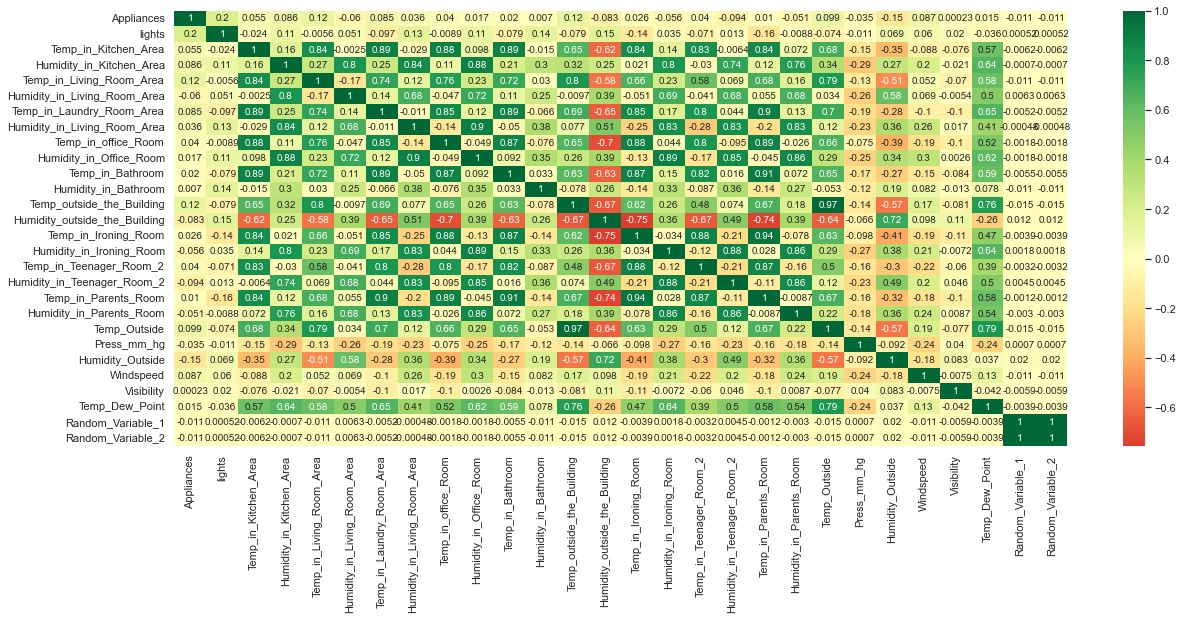

In [15]:
# Plotting a heatmap to check the correlation
plt.figure(figsize=(20,8))
sns.heatmap(energy_data_1.corr(), cmap='RdYlGn', annot=True, center=0)

<AxesSubplot:xlabel='Temp_outside_the_Building', ylabel='Appliances'>

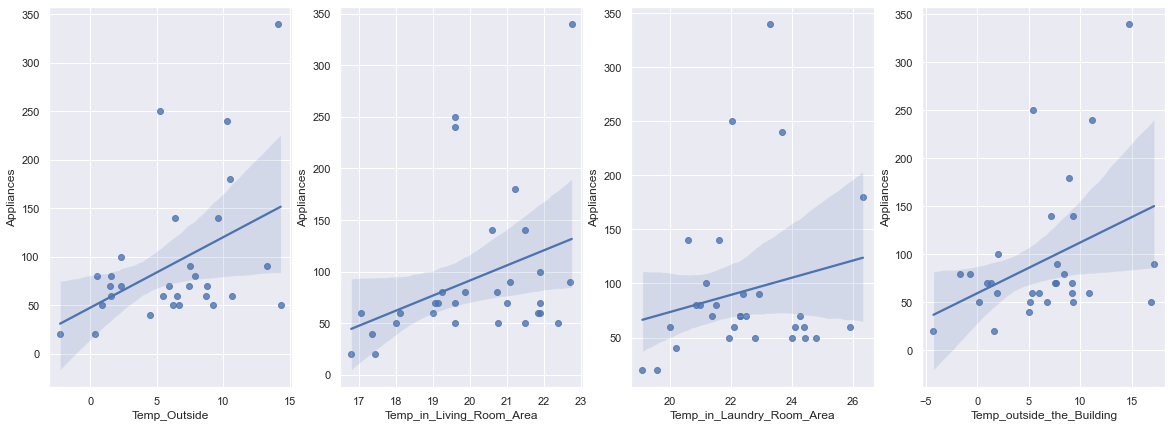

In [16]:
# Taking some sample of the dataset to plot a regression plot in other to check the correlation of some features
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
simple_linear_reg_df = energy_data_1[["Temp_Outside", "Appliances"]].sample(30, random_state=2)
#regression plot
sns.regplot(x= "Temp_Outside", y= "Appliances", data=simple_linear_reg_df, ax=ax1)

simple_linear_reg_df = energy_data_1[["Appliances", "Temp_in_Living_Room_Area"]].sample(30, random_state=2)
#regression plot
sns.regplot(x= "Temp_in_Living_Room_Area", y="Appliances", data=simple_linear_reg_df, ax=ax2)

simple_linear_reg_df = energy_data_1[["Appliances", "Temp_in_Laundry_Room_Area"]].sample(30, random_state=2)
#regression plot
sns.regplot(x="Temp_in_Laundry_Room_Area", y= "Appliances", data=simple_linear_reg_df, ax=ax3)

simple_linear_reg_df = energy_data_1[["Appliances", "Temp_outside_the_Building"]].sample(30, random_state=2)
#regression plot
sns.regplot(x= "Temp_outside_the_Building", y= "Appliances", data=simple_linear_reg_df, ax=ax4)

Correlation exists between the above features

## Feature Engineering

In [37]:
# Extract day, month year and hour from the Datetime column
# day
energy_data_1['Datetime_day'] = energy_data_1.date.dt.day

# month
energy_data_1['Datetime_month'] = energy_data_1.date.dt.month
 
# year
energy_data_1['Datetime_year'] = energy_data_1.date.dt.year

# hour
energy_data_1['Datetime_hour'] = energy_data_1.date.dt.hour

# Preview engineered date features
energy_data_1[['Datetime', 'Datetime_day', 'Datetime_month', 'Datetime_year', 'Datetime_hour']].head()

AttributeError: Can only use .dt accessor with datetimelike values

## Data Preprocessing

## Modelling

In [51]:
# Question 12

#Splitting the dataset for model training
from sklearn.model_selection import train_test_split
X = energy_data_2[['Temperature_in_Living_Room_Area']]
y = energy_data_2['Temp_outside_the_Building']
random_state = 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)


#Training the model
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression(n_jobs=1)
linear_model.fit(X_train, Y_train)
print('Your Accuracy is: ', linear_model.score(X_test, Y_test) )


# Making Predictions
predicted_values = linear_model.predict(X_test)

# Finding the R Squared Value in 2 d.p
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)
print("r2_score is:", round(r2_score, 2))

Your Accuracy is:  0.6458740034957208
r2_score is: 0.65


In [52]:
# Question 13
# removing the date and lights column
energy_data_2 = energy_data_1.drop(["date", "lights"],axis="columns")


# Normalizing and scaling the dataset using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalised_df = pd.DataFrame(scaler.fit_transform(energy_data_2), columns=energy_data_2.columns)
features_df = normalised_df.drop(columns=energy_data_2[["Appliances"]])
target = normalised_df['Appliances']


#Splitting the dataset for model training
from sklearn.model_selection import train_test_split
X = features_df
y = target
random_state = 42

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)


#Training the model
from sklearn.linear_model import LinearRegression
linear_model_1 = LinearRegression(n_jobs=5)
linear_model_1.fit(x_train, y_train)

#making Predictions
predicted_values_1 = linear_model_1.predict(x_test)

# model evalution on the test set
print('Your Accuracy is: ', linear_model_1.score(x_test, y_test) )


# Checking the Mean Absolute Error in 2 d.p
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values_1)
print("The mean absolute error:", round(mae, 2 ))

Your Accuracy is:  0.14890246319303535
The mean absolute error: 0.05


In [53]:
# Question 14
# The residual sum of squares
rss = np.sum(np.square(y_test - predicted_values_1))
print("The residual sum of squares is:", round(rss, 2))

The residual sum of squares is: 45.35


In [29]:
# Question 15
# The root mean squared error in 3 d.p
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values_1))
print("The root mean squared error is:", round(rmse, 3))

The root mean squared error is: 9.874


In [31]:
# Question 16
# Coefficient of Determination
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values_1)
print("The coefficient of determination is:", round(r2_score, 2))

The coefficient of determination is: -1.65


In [44]:
# Question 17
# Obtaining the weights of the features#comparing the effects of regularisation
def get_weights_df(model, feat, col_name):
#this function returns the weight of every feature
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ['Features', col_name]
    weights_df[col_name].round(3)
    return weights_df


linear_model_weights = get_weights_df(linear_model_1, x_train, 'Linear_Model_Weight')
linear_model_weights

,Features,Linear_Model_Weight
0,Humidity_in_Living_Room_Area,-0.456698
1,Temp_Outside,-0.321860
2,Temperature_in_Living_Room_Area,-0.236178
3,Temp_in_Parents_Room,-0.189941
4,Humidity_in_Teenager_Room_2,-0.157595
5,Humidity_Outside,-0.077671
6,Humidity_in_Ironing_Room,-0.044614
7,Humidity_in_Parents_Room,-0.039800
8,Temp_in_Bathroom,-0.015657
9,Temp_in_Kitchen_Area,-0.003281


In [34]:
# Question 18
# Training a ridge regression model with an alpha value of 0.4
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.4)
ridge_reg.fit(x_train, y_train)

# making preedictions
ridge_predict = ridge_reg.predict(x_test)


rmse = np.sqrt(mean_squared_error(y_test, ridge_predict))
print("The ridge root mean squared error is:", round(rmse, 3))
print("There's a difference in the RMSE")

The ridge root mean squared error is: 6.076
There's a difference in the RMSE


In [42]:
# Question 19
# Training a lasso regression with an alpha of 0.001
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

#making predictions
lasso_predict = lasso_reg.predict(x_test)

# Obtaining the new feature weights
def get_weights_df(model, feat, col_name):
#this function returns the weight of every feature
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ['Features', col_name]
    weights_df[col_name].round(3)
    return weights_df


lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_weight')
lasso_weights_df

,Features,Lasso_weight
0,Humidity_in_Teenager_Room_2,-1.627060e+00
1,Temp_in_Parents_Room,-1.453721e+00
2,Humidity_Outside,-8.998980e-01
3,Temp_in_Teenager_Room_2,-8.106537e-01
4,Windspeed,-6.273022e-01
5,Temp_in_office_Room,-4.856509e-01
6,Temperature_in_Living_Room_Area,-3.980302e-01
7,Press_mm_hg,-3.311019e-01
8,Temp_Outside,-1.097318e-01
9,Humidity_in_Living_Room_Area,-4.233626e-02


In [39]:
# Question 20
# New RMSE with the lasso regression
rmse = np.sqrt(mean_squared_error(y_test, lasso_predict))
print("The new root mean squared error with lasso regression is:", round(rmse, 3))

The new root mean squared error with lasso regression is: 6.073


#### Hyperparameter Tuning

In [47]:
#Try other models to figure out which one gives the best score using GridSearchCV
from sklearn.model_selection import ShuffleSplit, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
#from catboost import CatBoostRegressor

#We now write a function

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        "linear_regression":{
            "model":LinearRegression(),
            "params":{
                "normalize":[True, False]
            }
        },
        
        "ridge": {
            "model": Ridge(),
            "params": {
                "alpha": [1,2],
                "normalize":[True, False]
            }
        },
                
        "lasso": {
            "model": Lasso(),
            "params": {
                "alpha": [1,2],
                "selection": ["random", "cyclic"]
            }
        },
        
        "decision_tree": {
            "model": DecisionTreeRegressor(),
            "params": {
                "criterion": ["mse", "friedman_mse"],
                "splitter": ["best", "random"]
            }
        }
    }
    
    #To save the model into a dataframe
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config["model"], config["params"], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            "model":algo_name,
            "best_score":gs.best_score_,
            "best_params":gs.best_params_
        })
        
    return pd.DataFrame(scores, columns=["model","best_score", "best_params"])

# Calling the function

find_best_model_using_gridsearchcv(X,y)
    

,model,best_score,best_params
0,linear_regression,0.643973,{'normalize': True}
1,ridge,0.643973,"{'alpha': 1, 'normalize': False}"
2,lasso,0.637229,"{'alpha': 1, 'selection': 'random'}"
3,decision_tree,0.643542,"{'criterion': 'mse', 'splitter': 'random'}"


In [49]:
# Using Cross Validtion to get the best model
#creating a shufflesplit will randomize the sample and give a better accuracy
from sklearn.model_selection import ShuffleSplit, cross_val_score
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=42)

cross_val_score(LinearRegression(), X,y, cv=cv)

array([0.64277896, 0.64280864, 0.64260685, 0.64899849, 0.64443788])

In [50]:
# Saving the best model
import pickle
with open("energy_mode", "wb") as f:
    pickle.dump(linear_model, f)